<a href="https://colab.research.google.com/github/Jank201/spyData/blob/main/Deep_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==1.15.0
!pip install gym==0.19.0
!pip install stable-baselines gym-anytrading gym




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documen

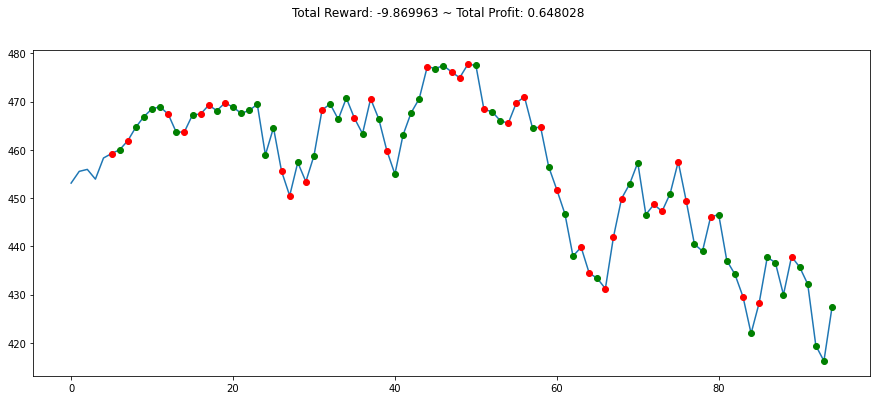

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import tensorflow

import gym
import gym_anytrading 

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
from stable_baselines.common.policies import MlpPolicy


df = pd.read_csv('https://raw.githubusercontent.com/Jank201/spyData/main/SPY.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

env = gym.make('stocks-v0', df=df, frame_bound=(10,100), window_size=5)


state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info, = env.step(action)
    if done:
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()


In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=100000)

In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110),window_size=5)
obs = env.reset()
while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
    print("info:", info)
    break


info: {'total_reward': 20.699980999999923, 'total_profit': 0.9729404841350021, 'position': 0}


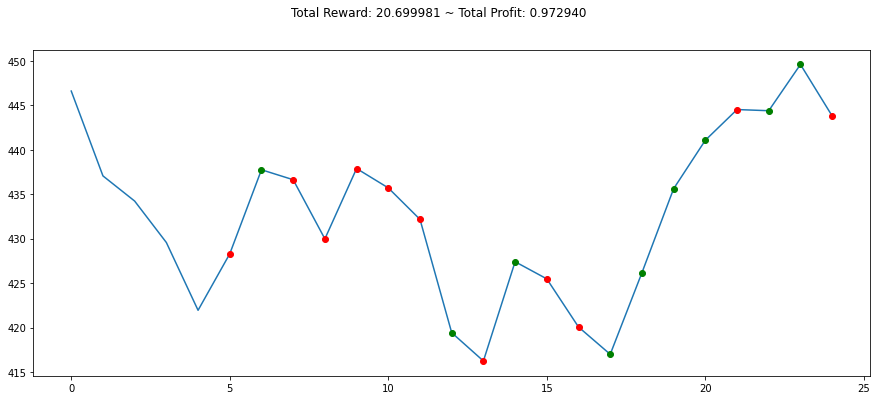

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()
